In [103]:
import pandas as pd
import numpy as np
import string
import re
from datetime import date

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [4]:
pets = pd.read_csv('pets.csv', index_col = "ID")
pets['PublishDate'] = pd.to_datetime(pets['PublishDate'])

In [5]:
pets.head()

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee
ID,,,,,,,,,,,,,,,,,,
42351895,Brody,SNARR Northeast,Say hello to your new best buddy Brody! This s...,Male,Puppy,Medium,White Plains,NY,10602,2018-08-01 08:48:26,Short,Beagle,Plott Hound,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,Short,Bloodhound,NaN,False,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN
42301355,Oreo,SNARR Northeast,Meet Oreo! This cutie pie is looking for the p...,Male,Young,Small,White Plains,NY,10602,2018-07-27 02:24:15,Medium,Shih Tzu,NaN,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0
42301336,B-52,SNARR Northeast,Meet darling B-52! This handsome lovebug is re...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-27 02:00:45,Short,Border Collie,Boxer,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0
42301298,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Female,Adult,Medium,White Plains,NY,10602,2018-07-27 01:44:44,Short,Pomeranian,Beagle,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0


***ANALYSIS***  
2. Look at data, create lists of most popular breeds, sizes
    - histograms of ages, post date
    - bar graphs of breeds, locations, sizes, health, other attributes
3. size vs. urban/suburban locations
4. Statistics:
    - which dogs get adopted faster?  (Breed, Size, Age, Coat)
    - which shelters have most adoptions??
5. Word cloud from all stories for each breed (top breeds)


In [210]:
topbreeds = pets['PrimaryBreed'].value_counts()[0:15]
topbreeds.index

Index(['Pit Bull Terrier', 'Labrador Retriever', 'Chihuahua', 'Hound',
       'Terrier', 'American Staffordshire Terrier', 'Shepherd', 'Boxer',
       'German Shepherd Dog', 'Beagle', 'Mixed Breed', 'American Bulldog',
       'Dachshund', 'Shih Tzu', 'Border Collie'],
      dtype='object')

In [27]:
pets['SecondaryBreed'].value_counts().head(15)

Labrador Retriever                307
Mixed Breed                       295
Hound                             288
Terrier                           254
Pit Bull Terrier                  246
Shepherd                          134
Chihuahua                          95
Boxer                              94
Beagle                             87
Dachshund                          76
American Staffordshire Terrier     64
Border Collie                      53
American Bulldog                   53
Poodle                             46
German Shepherd Dog                40
Name: SecondaryBreed, dtype: int64

In [275]:
#most popular purebred dogs
pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts().head()
#top_purebreds = list(pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts()[0:19].index)
#top_purebreds

#use this list to sort descriptions & make word clouds

Pit Bull Terrier                  287
Chihuahua                         201
American Staffordshire Terrier    103
German Shepherd Dog                85
Labrador Retriever                 79
Name: PrimaryBreed, dtype: int64

In [129]:
pets['City'].value_counts().head(10)

New York        709
Flushing        194
Freeport        179
Rockaway        145
Brooklyn        141
Feasterville    133
North Wales     115
Lambertville    110
Wantagh         110
Yardley          94
Name: City, dtype: int64

In [88]:
Bronx = (10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456,10454, 10455, 10459, 10474, \
         10463, 10471, 10466, 10469, 10470, 10475,10461,10462,10464, 10465, 10472, 10473)
Brooklyn = (11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228,11204, 11218, 11219, 11230,11234, \
            11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231, 11203, 11210, \
            11225, 11226, 11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237)
Manhattan = (10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036, 10029, 10035, \
             10010, 10016, 10017, 10022, 10012, 10013, 10014, 10004, 10005, 10006, 10007, 10038, 10280, \
             10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025, 10031, \
             10032, 10033, 10034, 10040)
Queens = (11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367, \
          11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, \
          11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, \
          11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11368, \
          11369, 11370, 11372, 11373, 11377, 11378)
StatenIsland = (10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314)

In [96]:
#pets[pets['Zip'].isin(Bronx)].shape
#pets[pets['Zip'].isin(Manhattan)].shape
#pets[pets['Zip'].isin(Brooklyn)].shape
#pets[pets['Zip'].isin(Queens)].shape
#pets[pets['Zip'].isin(StatenIsland)].shape


(40, 19)

In [235]:
pets['DaysPosted'] = (date(2018,8,6) - pd.to_datetime(pets['PublishDate']).dt.date)/ np.timedelta64(1, 'D')

In [ ]:
## Seaborn plots ##
import seaborn as sns

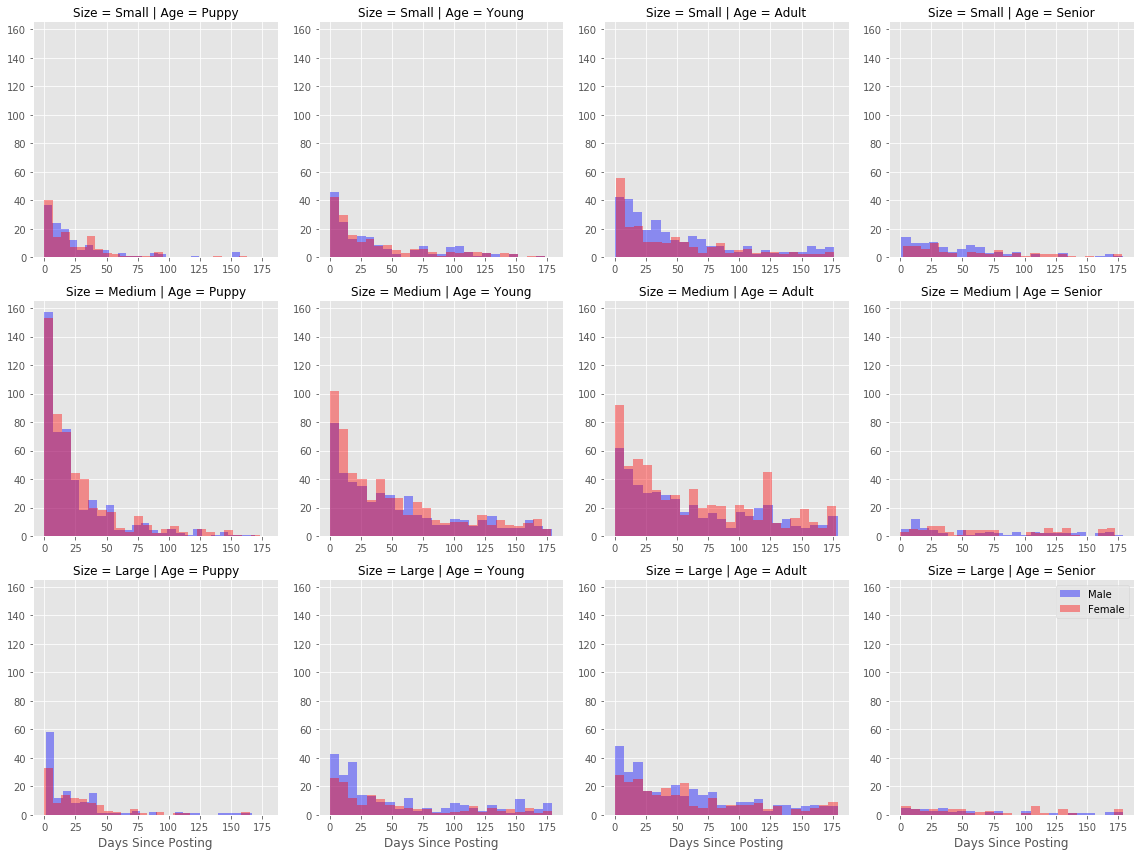

In [276]:
#Histograms of dogs by size, age, gender:

PostTime = sns.FacetGrid(pets[pets['DaysPosted'] < 180], col="Age", hue="Gender", row = "Size", \
                         palette=("blue","red"), size=4, row_order=("Small","Medium","Large"), \
                         col_order=("Puppy","Young","Adult","Senior"))
PostTime.map(sns.distplot, "DaysPosted", kde=False, bins = 24)
PostTime.set_xlabels("Days Since Posting") 
plt.legend()

#, xlabel = "Days Since Posting"   ? reverse x-axis?

In [ ]:
# remember assumptions -- pets listed at same rate over past few months
# Can I calculate rate of adoption over 1st month?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

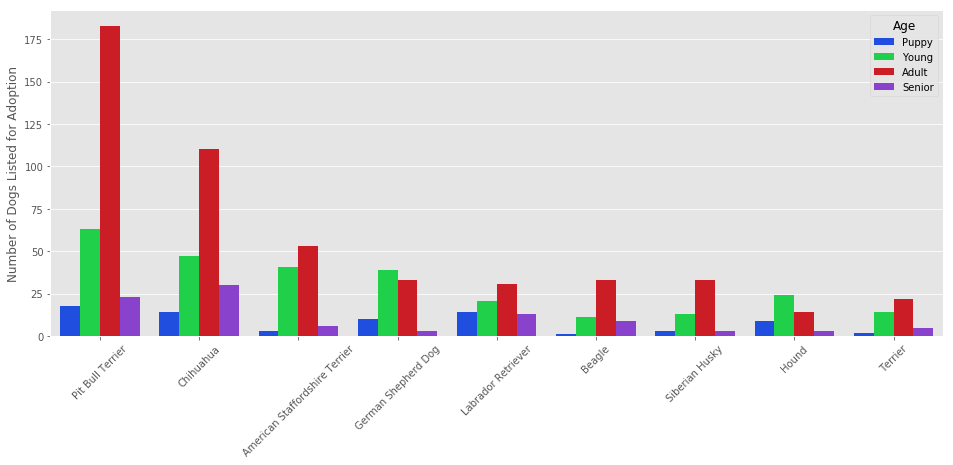

In [280]:
##Create bar plot of purebred dog breeds & number posted by age
#by location?

PureBreds = pets.loc[pets['PrimaryBreed'].isin(top_purebreds[0:9]) & pets['MixedBreed']==False]

plt.figure(figsize=(16,6))
g=sns.countplot(x ='PrimaryBreed',data=PureBreds, order=top_purebreds[0:9], \
              hue="Age", hue_order=("Puppy","Young","Adult","Senior"), palette = "bright")
g.set_xlabel("") 
g.set_ylabel("Number of Dogs Listed for Adoption")

plt.xticks(rotation=45)
#g.set_xticklabels(rotation=45)


In [274]:
PureBreds

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee,BreedCombo,DaysPosted
ID,,,,,,,,,,,,,,,,,,,,
42351895,Brody,SNARR Northeast,Say hello to your new best buddy Brody! This s...,Male,Puppy,Medium,White Plains,NY,10602,2018-08-01 08:48:26,Short,Beagle,Plott Hound,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0,BeaglePlott Hound,5.0
42300690,Tex,SNARR Northeast,Sweet Tex is looking for a home to call his ow...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-26 22:29:49,Medium,Labrador Retriever,Border Collie,True,"['Children', 'Other Dogs', 'Cats']",['Shots Current'],NaN,450.0,Labrador RetrieverBorder Collie,11.0
42300645,Stockings,SNARR Northeast,Cutie-pie Stockings is looking for a home to c...,Female,Puppy,Medium,White Plains,NY,10602,2018-07-26 22:22:07,Medium,Labrador Retriever,Border Collie,True,"['Children', 'Other Dogs', 'Cats']",['Shots Current'],NaN,450.0,Labrador RetrieverBorder Collie,11.0
42282745,Camacho,Animal Welfare League of Westchester County…,Camacho is a real cutie. He is shy at first bu...,Male,Young,Small,White Plains,NY,10602,2018-07-25 11:17:44,Short,Chihuahua,NaN,False,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,NaN,12.0
42081305,Palermo,SNARR Northeast,Pretty Palermo is looking for her forever home...,Female,Puppy,Medium,White Plains,NY,10602,2018-07-03 21:30:02,Short,Labrador Retriever,Collie,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,Labrador RetrieverCollie,34.0
41942565,Taylor,SNARR Northeast,"Howdy! I'm Taylor, a sweet, easy going gal fro...",Female,Senior,Large,White Plains,NY,10602,2018-06-19 04:11:15,Medium,Labrador Retriever,NaN,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,250.0,NaN,48.0
41712599,Groot,SNARR Northeast,Name: Groot\n\nApproximate Age: 1 1/2yrs (Nov ...,Male,Young,Large,White Plains,NY,10602,2018-05-24 13:47:51,NaN,Pit Bull Terrier,NaN,True,"['', '', '']","['Spay/Neuter', 'Special needs', 'Shots Current']",Deaf,325.0,NaN,74.0
41194340,Leroy,SNARR Northeast,Name: Leroy\n\nApproximate Age: 4yrs\n\nBreed:...,Male,Adult,Medium,White Plains,NY,10602,2018-03-16 18:03:28,NaN,Labrador Retriever,Pit Bull Terrier,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,325.0,Labrador RetrieverPit Bull Terrier,143.0
41036102,Lionel,SNARR Northeast,Meet our “hoarding case dogs “. These poor sou...,Male,Adult,Large,White Plains,NY,10602,2018-02-24 04:35:59,Medium,German Shepherd Dog,Black Labrador Retriever,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,German Shepherd DogBlack Labrador Retriever,163.0


In [348]:
#Create word clouds from listing text for popular dog breeds

import nltk

# Uncomment the following lines the first time you run the code
#nltk.download('stopwords')
#nltk.download('wordnet')

tbr = ['[removed]', '[deleted]']
from textblob import TextBlob
from wordcloud import WordCloud

In [419]:
PitbullTerrier=pets.loc[(pets['PrimaryBreed']=='Pit Bull Terrier') | (pets['SecondaryBreed']=='Pit Bull Terrier')]
Chihuahua=pets.loc[(pets['PrimaryBreed']=='Chihuahua') | (pets['SecondaryBreed']=='Chihuahua')]
LabradorRetriever=pets.loc[(pets['PrimaryBreed']=='Labrador Retriever') | (pets['SecondaryBreed']=='Labrador Retriever')]

Dachshund=pets.loc[(pets['PrimaryBreed']=='Dachshund') | (pets['SecondaryBreed']=='Dachshund')]



In [420]:
df = Dachshund

In [421]:
df['Text'] = df['Text'].fillna('').apply(lambda x: '' if x in tbr else x)

In [422]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].apply(lambda x: re.sub('http\S*', '', x))
df['Text'] = df['Text'].apply(lambda x: re.sub('\s+', ' ', x))
df = df.loc[df['Text'] != ""]
df['Text'] = df['Text'].apply(lambda x: re.sub('[^\w\s]','', x)) 


In [423]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
stop 
dogwords = ('dog','dogs','home','year','adoption','fee','years','old','fill','application','animal',\
            'alliance','im','hes','need','month')
stop.extend(dogwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [424]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [429]:
from os import path
from PIL import Image
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

daschund = np.array(Image.open(path.join(d, "dachshund-stenci_1.gif")))


NameError: name '__file__' is not defined

In [430]:
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wc.generate(''.join(df['Text']))

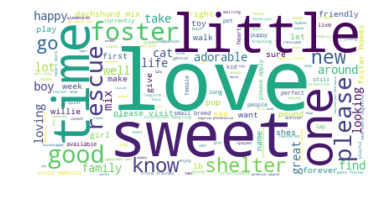

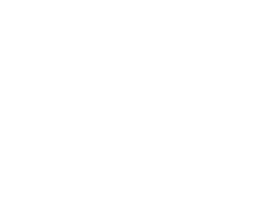

In [431]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()